## Computing integrals with SymPy

The function `integrate()` from SymPy allows us to compute integrals symbolically in Python.

**Example:** Compute $$\int_0^1 x \cdot \cos(x) \text{d}x.$$

In [2]:
import sympy as sy
x = sy.symbols('x')

In [4]:
# Calling integrate with two arguments: 
# a) an algebraic expression as integrand
# b) the variable of integration (a symbol)
# --> result: antiderivative of the integrand
sy.integrate(x*sy.cos(x), x)

x*sin(x) + cos(x)

In [8]:
# Calling integrate with two additional arguments:
# c) lower limit of integration (here: 0)
# d) upper limit of integration (here: 1)
# NOTE: arguments b), c) and d) have to be clustered to a tuple
sy.integrate(x*sy.cos(x), (x, 0, 1))

-1 + cos(1) + sin(1)

In [9]:
# to get the floating point value
sy.integrate(x*sy.cos(x), (x, 0, 1)).evalf()

0.381773290676036

### Improper integrals with SymPy

**Example**: Compute
$$\int_{1}^{\infty} \frac{\ln(x)}{x^2} \text{d}x.$$

In [10]:
sy.integrate(sy.log(x)/x**2, (x, 1, sy.oo))

1

### Integrands for which no primitive function can be expressed by an elementary function

**Example**: $$\int \text{e}^{-x^2} \text{d}x$$

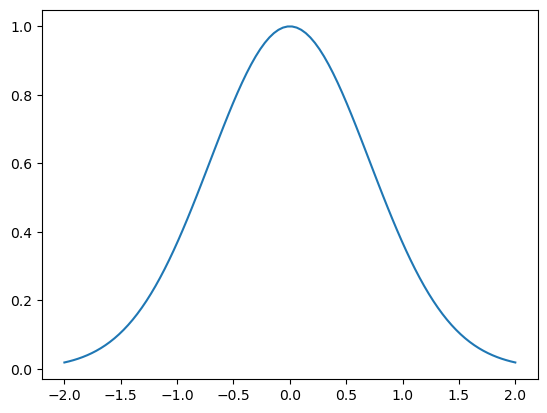

In [12]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-2,2,100)
y = np.exp(-x**2)
plt.plot(x,y)

In [14]:
x = sy.symbols('x')
sy.integrate(sy.exp(-x**2),(x,-1,3))

sqrt(pi)*erf(1)/2 + sqrt(pi)*erf(3)/2

**Example 2:** Compute an approximate value for
$$\int_{0}^2 \text{e}^{\sin(x)} \text{d}x.$$

In [15]:
sy.integrate(sy.exp(sy.sin(x)),(x,0,2))

Integral(exp(sin(x)), (x, 0, 2))

In [18]:
sy.integrate(sy.exp(sy.sin(x)),(x,0,2)).evalf()

4.23653115722101

In order to get an approximate value for the integral, we can use (a slight modification) of our `lower_sum()` function from last week:

In [23]:
import math

def fun_f(x):
    return math.exp(math.sin(x))

def lower_sum(fun, n,a,b):
    delta_n = (b-a)/n
    riemann_sum = 0
    for i in range(n):
        xi = a + i*delta_n
        #print(i, xi, fun(xi))
        riemann_sum += fun(xi)*delta_n # computes the area one of the bars
    return riemann_sum

In [24]:
lower_sum(fun_f,100,0,2)

4.22163760856246

There are of course much more elaborate and precise methods to compute integrals numerically. One very good package for this task is `SciPy`.

In [25]:
import sys
!conda install --yes --prefix {sys.prefix} scipy

Solving environment: done

# All requested packages already installed.

Retrieving notices: ...working... done


In [28]:
from scipy.integrate import quad

In [29]:
quad(fun_f, 0,2)

(4.23653115722101, 4.7034944352886244e-14)